In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as pltm
import matplotlib.pyplot as plt
import matplotlib
np.set_printoptions(precision=4, suppress=True, linewidth=120)

In [5]:

start = '2020-02-24'
end = '2020-12-31'

data = pd.read_csv('C:\\Users\\jmjun\\KODATA_jupyter\\data\\dataset1.csv')
data
# indprod = DataReader('IPMAN', 'fred', start=start, end=end)
# income = DataReader('W875RX1', 'fred', start=start, end=end)
# sales = DataReader('CMRMTSPL', 'fred', start=start, end=end)
# emp = DataReader('PAYEMS', 'fred', start=start, end=end)

,STDR_YM,SIGNGU_NM,EMPLY_CO,ECNY_CO,RETIRE_CO
0,2015-11,군산시,5,1,2
1,2015-11,군산시,1,0,0
2,2015-11,군산시,26,1,0
3,2015-11,군산시,4,1,0
4,2015-11,군산시,9,3,2
...,...,...,...,...,...
50737,2020-07,군산시,4,0,0
50738,2020-07,군산시,50,0,0
50739,2020-07,군산시,3,0,0
50740,2020-07,군산시,21,0,0


In [6]:
data.columns

Index(['STDR_YM', 'SIGNGU_NM', 'EMPLY_CO', 'ECNY_CO', 'RETIRE_CO'], dtype='object')

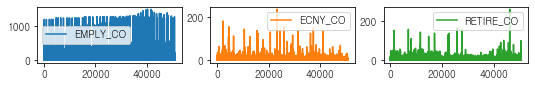

In [8]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

data.loc[:, 'STDR_YM':'RETIRE_CO'].plot(subplots=True, layout=(5, 5), figsize=(15, 6));

In [6]:
# Create log-differenced series
for i in data.columns[1:]:
    data[i] = (np.log(data[i])).diff() * 100

In [7]:
data.iloc[1:]

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,2020.02.25,18.232156,80.437282,12.129621,0.000000,0.000000,0.000000,69.314718,0.000000,13.353139,-15.415068,0.000000,0.000000,0.000000,69.314718,19.035373,4.879016,0.000000
2,2020.02.26,22.314355,27.443685,30.506518,40.546511,0.000000,0.000000,40.546511,0.000000,7.232066,0.000000,51.082562,69.314718,0.000000,-69.314718,17.488658,17.435339,0.000000
3,2020.02.27,20.067070,14.842001,40.694112,0.000000,0.000000,98.082925,69.314718,0.000000,24.613307,0.000000,33.647224,125.276297,0.000000,0.000000,18.045414,36.464311,0.000000
4,2020.02.28,11.980120,8.269172,25.621880,28.768207,0.000000,48.550782,60.613580,0.000000,18.232156,0.000000,25.131443,82.667857,51.082562,0.000000,20.490979,24.512246,0.000000
5,2020.02.29,17.693071,20.067070,44.719993,40.546511,0.000000,7.410797,43.531807,0.000000,14.107860,15.415068,10.536052,109.861229,0.000000,69.314718,17.425186,24.889605,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2020.12.27,2.098749,2.375409,0.274384,2.325243,1.652930,1.023027,0.162470,4.348511,1.801446,2.101494,2.327942,3.823801,1.025650,0.925076,1.486691,3.654892,1.854358
308,2020.12.28,1.700886,1.975660,0.312663,1.718384,1.150540,0.380953,0.324149,1.408474,1.419611,2.411908,2.928882,2.238661,0.127470,1.280896,1.976859,2.018639,2.846246
309,2020.12.29,2.901816,0.973383,0.376502,1.178217,1.419806,3.731776,0.645164,2.758796,1.852441,1.836519,2.027719,1.693361,1.013950,0.724641,1.184447,1.270867,1.267444
310,2020.12.30,2.098263,2.197891,0.658704,1.741699,0.842307,2.293402,2.539819,1.351372,1.966485,1.462392,4.023788,1.665163,3.956016,0.180343,0.962552,2.801740,2.487690


In [24]:
data=data.iloc[1:]

In [19]:
# De-mean and standardize
for i in data.columns[1:]:
    data[i] = (data[i] - data[i].mean()) / data[i].std()
# dta['std_indprod'] = (dta['dln_indprod'] - dta['dln_indprod'].mean()) / dta['dln_indprod'].std()
# dta['std_income'] = (dta['dln_income'] - dta['dln_income'].mean()) / dta['dln_income'].std()
# dta['std_sales'] = (dta['dln_sales'] - dta['dln_sales'].mean()) / dta['dln_sales'].std()
# dta['std_emp'] = (dta['dln_emp'] - dta['dln_emp'].mean()) / dta['dln_emp'].std()

C:\ProgramData\Anaconda3\envs\data\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data

,날짜,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
1,2020.02.25,4.989613,15.380217,2.434523,-0.388227,-0.420057,-0.272243,8.770919,-0.200907,4.279096,-2.791213,-0.402708,-0.210713,-0.427323,7.738133,6.243914,1.071123,-0.348092
2,2020.02.26,6.250217,5.053445,6.426734,6.356732,-0.420057,-0.272243,5.017271,-0.200907,1.984805,-0.270757,10.331410,5.918975,-0.427323,-8.206172,5.713566,4.880444,-0.348092
3,2020.02.27,5.556244,2.597777,8.639894,-0.388227,-0.420057,14.450035,8.770919,-0.200907,8.499614,-0.270757,6.667675,10.867808,-0.427323,-0.234019,5.904471,10.653429,-0.348092
4,2020.02.28,3.058953,1.316941,5.365591,4.397397,-0.420057,7.015245,7.635603,-0.200907,6.107841,-0.270757,4.878231,7.099829,11.628249,-0.234019,6.743023,7.027427,-0.348092
5,2020.02.29,4.823141,3.615977,9.514480,6.356732,-0.420057,0.840120,5.406790,-0.200907,4.561979,2.249700,1.811261,9.504612,-0.427323,7.738133,5.691802,7.141909,-0.348092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2020.12.27,0.007537,0.168433,-0.140917,-0.001420,0.030896,-0.118686,-0.251999,0.342072,-0.050691,0.072850,0.086469,0.127436,-0.185268,-0.127623,0.226700,0.699749,0.028011
308,2020.12.28,-0.115326,0.090535,-0.132602,-0.102372,-0.106166,-0.215061,-0.230903,-0.025037,-0.193810,0.123605,0.212746,-0.012742,-0.397240,-0.086699,0.394772,0.203345,0.229187
309,2020.12.29,0.255528,-0.104777,-0.118733,-0.192229,-0.032705,0.287898,-0.189018,0.143572,-0.031578,0.029525,0.023382,-0.060964,-0.188029,-0.150676,0.123065,-0.023513,-0.091027
310,2020.12.30,0.007387,0.133841,-0.057427,-0.098494,-0.190258,0.071998,0.058195,-0.032167,0.011168,-0.031647,0.442822,-0.063458,0.506303,-0.213277,0.046980,0.440921,0.156464


In [25]:
# Get the endogenous data
endog = data.loc['2020-02-25':, '서울':'제주']

# Create the model
mod = sm.tsa.DynamicFactor(endog, k_factors=1, factor_order=2, error_order=2)
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

C:\ProgramData\Anaconda3\envs\data\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [26]:
print(res.summary(separate_params=False))

                                                                     Statespace Model Results                                                                     
Dep. Variable:     ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']   No. Observations:                  109
Model:                                                                                  DynamicFactor(factors=1, order=2)   Log Likelihood                 748.279
                                                                                                           + AR(2) errors   AIC                          -1356.557
Date:                                                                                                    Thu, 04 Aug 2022   BIC                          -1168.163
Time:                                                                                                            16:05:36   HQIC                         -1280.157
Sample:               

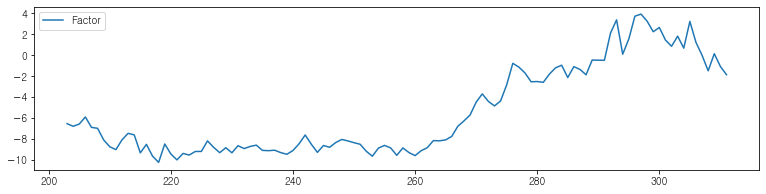

In [27]:
fig, ax = plt.subplots(figsize=(13,3))

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()

# Retrieve and also plot the NBER recession indicators
rec = DataReader('USREC', 'fred', start=start, end=end)
ylim = ax.get_ylim()

In [30]:
data = pd.read_csv('구직급여_신청_동향_월__20220804161839.csv', encoding='cp949')

In [48]:
data.index = data['시점']
data.drop('시점', axis=1, inplace=True)

array([[<AxesSubplot:xlabel='시점'>, <AxesSubplot:xlabel='시점'>, <AxesSubplot:xlabel='시점'>]], dtype=object)

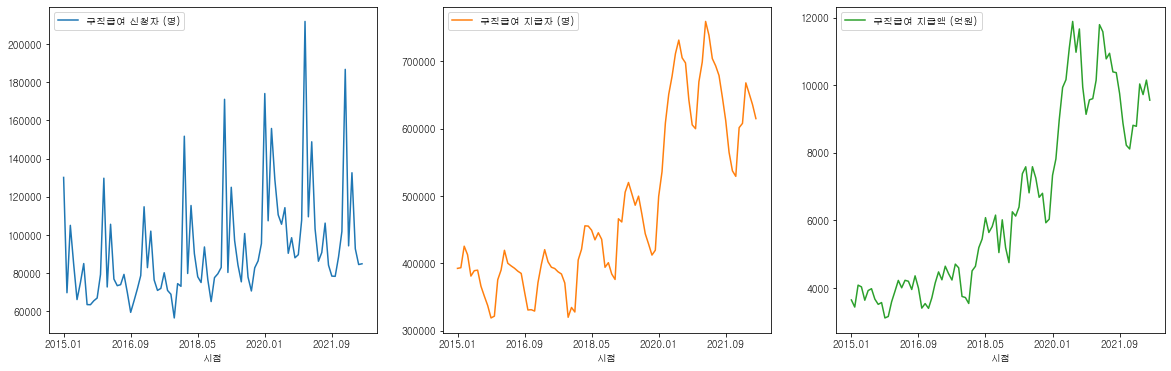

In [54]:
data.iloc[:, :].plot(subplots=True, layout=(1, 3), figsize=(20, 6))

In [37]:
data.loc[60]

시점               2020.01
구직급여 신청자 (명)      174079
구직급여 지급자 (명)      499200
구직급여 지급액 (억원)       7336
Name: 60, dtype: object